In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
library_df = pd.read_csv("/kaggle/input/art-garfunkels-library/Art Garfunkel Library.csv")
library_df.head()

,Date Read,Author,Books,Year Published,Pages,Favorite
0,Jun-68,Jean-Jacques Rousseau,The Confessions,1781,606,1
1,Jun-68,Erich Fromm,The Art of Loving,1956,146,1
2,Jun-68,Mark Twain,The Adventures of Huckleberry Finn,1884,288,0
3,Jul-68,James Thurber,My Life and Hard Times,1933,115,0
4,Jul-68,William Shakespeare,Romeo and Juliet,1596,146,0


In [3]:
# Separates date and year into separate columns
def get_year_from_date_read_column(date):
    year_date_split = date.split('-')
    if len(year_date_split) == 2:
        year = int(year_date_split[1])
        if year < 41: # Art's Year of Birth: 1941
            return 2000 + year
        else :
            return 1900 + year
    else:
        return int(date)
    
library_df['Year Read'] = library_df['Date Read'].apply(lambda date: get_year_from_date_read_column(date))
library_df['Year Read'].unique()

array([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 2022, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [4]:
def get_month_from_date_read_column(date):
    month_date_split = date.split('-')
    if len(month_date_split) == 2:
        return month_date_split[0]
    else:
        return np.nan

library_df['Month Read'] = library_df['Date Read'].apply(lambda date: get_month_from_date_read_column(date))
library_df['Month Read'].unique()

array(['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb',
       'May', 'Mar', 'Apr', nan], dtype=object)

In [5]:
library_df.describe(include="object")

,Date Read,Author,Books,Year Published,Month Read
count,1321,1321,1321,1321,1196
unique,494,966,1305,329,12
top,2008,William Shakespeare,The Confessions,1988,Dec
freq,34,15,3,21,123


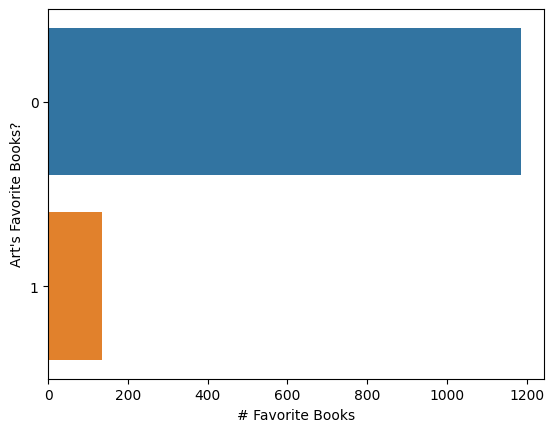

In [6]:
sns.countplot(y=library_df['Favorite'] ,data=library_df)
plt.xlabel("# Favorite Books")
plt.ylabel("Art's Favorite Books?")
plt.show()

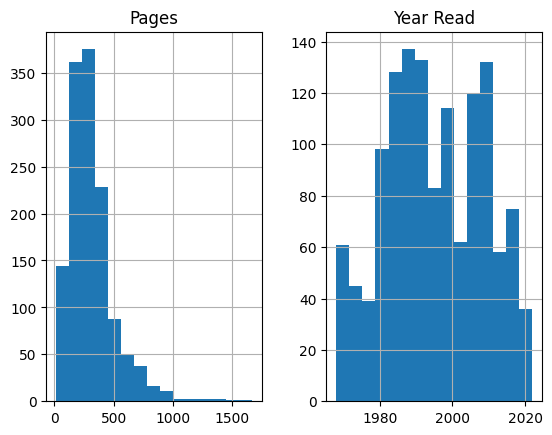

In [7]:
library_df[['Pages', 'Year Read']].hist(bins = 15)
plt.show()

In [8]:
library_df.head()

,Date Read,Author,Books,Year Published,Pages,Favorite,Year Read,Month Read
0,Jun-68,Jean-Jacques Rousseau,The Confessions,1781,606,1,1968,Jun
1,Jun-68,Erich Fromm,The Art of Loving,1956,146,1,1968,Jun
2,Jun-68,Mark Twain,The Adventures of Huckleberry Finn,1884,288,0,1968,Jun
3,Jul-68,James Thurber,My Life and Hard Times,1933,115,0,1968,Jul
4,Jul-68,William Shakespeare,Romeo and Juliet,1596,146,0,1968,Jul


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


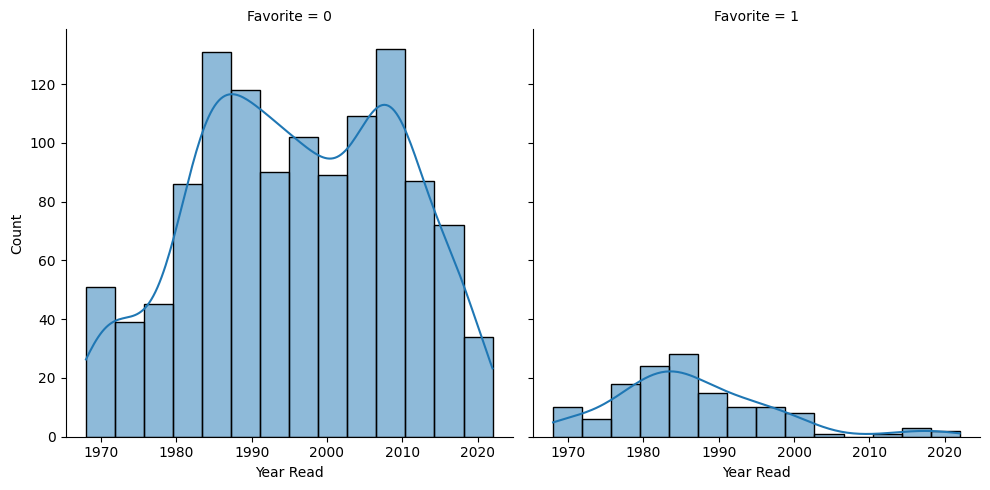

In [9]:
sns.displot(data=library_df, x="Year Read", col="Favorite", kde=True)
plt.show()